<a href="https://colab.research.google.com/github/tbonne/peds/blob/main/docs/introModeling/IntroModelling_LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1bZKsW45WU9qy7y13X5QF5IYgJ58OTYm0'>

***

## <font color='darkorange'>Logistic regression</font>

> In previous classes we have used exploritory approaches to visualize and quantify relationships between variables. We used linear regression to make predictions about numeric values (e.g., boston house prices), now we will use logistic regression models for a classification problem. Here we will try and distinguish tissue samples as positive/negative for breast cancer.

Let's load in our growing list of python packages that we are getting used to using.


In [ ]:
import sklearn as sk
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf


Then let's load in the breast cancer dataset, and get it into a format we can use.

In [ ]:
# The tissue sample dataset
df_cancer = pd.read_csv('/content/tissueSamples.csv')

#take a look
df_cancer

### <font color='darkorange'>Understand the data </font>

What kinds of data is the cancer data?


In [ ]:
df_cancer.dtypes

Are there missing values anywhere?

In [ ]:
df_cancer.isna().sum()

### <font color='darkorange'>Visualize and Explore </font>

Histogram of the target variable

In [ ]:
sns.displot(data=df_cancer,x='benign')

Plot the target variable (benign) on the y-axis with another variable on the x-axis. Try out a few different variables on the x-axis.

In [ ]:
sns.scatterplot(data=df_cancer, x="benign",y="mean_radius")

Create a heat map to help you explore

In [ ]:
#calculate the correlations between each variable
df_cancer_corr = df_cancer.corr()

#plot the correlations in a heat map (hotter = higher correlation)
sns.heatmap(data=df_cancer_corr)

### <font color='darkorange'>Data wrangeling </font>

#### Data preprocessing (binary variables)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#get the columns names of features you'd like to turn into 0/1
bin_names = ['benign']

#create a dataframe of those features
bin_features = df_cancer[bin_names]

#fit the scaler to those data
bin_scaler = OrdinalEncoder().fit(bin_features.values)

#use the scaler to transform your data
bin_features = bin_scaler.transform(bin_features.values)

#put these scaled features back into your transformed features dataframe
df_cancer[bin_names] = bin_features

#take a look
df_cancer

In [ ]:
bin_scaler.categories_

#### Data preprocessing (categorical variables)

Technician ID number is a categorical value, but it is being treated as a number (int64). Let's convert it to a category.

In [ ]:
df_cancer['technician'] = df_cancer.technician.astype('category')

In [ ]:

#categorical variables
cat_names = ['technician']

#create dummy variables
df_cat = pd.get_dummies(df_cancer[cat_names])

#add them back to the original dataframe
df_cancer = pd.concat([df_cancer,df_cat], axis=1)

#remove the old columns
df_cancer = df_cancer.drop(cat_names, axis=1)

#take a look
df_cancer

#### Split our dataframe into training and testing datasets

In [ ]:
#split the data into training and testing (80/20 split)
df_train, df_test = sk.model_selection.train_test_split(df_cancer, test_size=0.20)


In [ ]:
#take a look training dataset
df_train.shape

In [ ]:
#take a look
df_test.shape


### Data pre-processing (numeric)

In [ ]:
#Feature Scaling (after spliting the data!)
from sklearn.preprocessing import StandardScaler 

#numeric variables
numb_names = df_train.drop(['benign','technician_1','technician_2','technician_3','technician_4'],axis=1).select_dtypes('number').columns.tolist()

#create the standard scaler object
sc = StandardScaler()

#use this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data
df_train[numb_names] = sc.fit_transform(df_train[numb_names])

#use the fit from the training data to transform the test data
df_test[numb_names] = sc.transform(df_test[numb_names])



### <font color='darkorange'>Modeling and Prediction</font>

> Let's look building our second kind of model -- logistic regression! How well can we predict the benign cases? This is similar to clustering analysis except we have the labels! Can we train a model to make the right predictions?
<br>
We will follow a general approach when building models. We will divide the dataset into *training* and *testing* datasets. 
<br>
This lets us fit the model to one part of the data and then use the withheld data to test the predictions of the model. This helps us avoid *overfitting* our model!

### Fit a model

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

Below choose a variable to predict if the tissue sample is benign or not.

In general when using sklearn to fit a model we will follow these steps:

In [ ]:
#define model parameters
log_reg = smf.logit('benign ~ mean_symmetry', data=df_train)

#fit the model to the training data
results = log_reg.fit()

#Get a summary of the model parameters
print(results.summary())


#### Visualize and explore the model predictions

Let's look at where the model to a good/bad job of classifying images into benign or not!

In [ ]:
#let's first predict values in the testing dataset
df_test['benign_prob'] = results.predict(df_test).round(2)

df_test['benign_pred'] = (df_test['benign_prob']>0.5).astype(int) #here we've used 0.5 as the threshold of benign or not!

df_test

Let's plot the predicted and observed points!

In [ ]:
sns.scatterplot(data=df_test,x='mean_symmetry', y='benign')

In [ ]:
sns.scatterplot(data=df_test,x='mean_symmetry', y='benign')
sns.scatterplot(data=df_test,x='mean_symmetry', y='benign_pred')

<img src='http://drive.google.com/uc?export=view&id=1qWrKY9TgpgQaBCzZfz1xLTV6iCeSwfmG' width="100" align = 'left'>

How good is the model at classifying?

In [ ]:
#confusion table
confusion_matrix = sk.metrics.confusion_matrix(df_test['benign'], df_test['benign_pred'])
print(confusion_matrix)

In [ ]:
#more visual approach
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

Measuring classification success:

In [ ]:
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(df_test['benign'], df_test['benign_pred'])))
print('precision: {:.2f}'.format(sk.metrics.precision_score(df_test['benign'], df_test['benign_pred'])))
print('recal: {:.2f}'.format(sk.metrics.recall_score(df_test['benign'], df_test['benign_pred'])))


> **Accuracy** is the overall ability of the model to correctly identify positive and negative samples.

> **Precision** is intuitively the ability of the classifier to not label a sample as positive if it is negative.

> **Recall** is intuitively the ability of the classifier to find all the positive samples.

Compare that accuracy if we just predicted the most common type (i.e., let's compute a baseline!)

In [ ]:
df_cancer.benign.value_counts()

In [ ]:
357/(212+357)

Is all that variation noise? Or maybe there are other variables that might explain why the predictions are off.

<img src='http://drive.google.com/uc?export=view&id=1qWrKY9TgpgQaBCzZfz1xLTV6iCeSwfmG' width="100" align = 'left'>

### Fit a more complex model

This time we will try logistic regression with many predictors. How high can you get the accuracy?

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

In [ ]:
#get all the column names, with a + between them, as a string
all_columns = "+".join(df_train.drop(['benign','technician_1'],axis=1).columns )

#write the formula
my_formula = "benign~" + all_columns

#define model parameters
log_reg2 = smf.logit(my_formula , data=df_train)

#fit the model to the training data
results2 = log_reg2.fit(method='bfgs')

#Get a summary of the model parameters
print(results2.summary())


Visualize and explore these predictions

In [ ]:
#let's first predict values in the testing dataset
df_test['benign_prob_multi'] = results2.predict(df_test).round(2)

df_test['benign_pred_multi'] = (df_test['benign_prob_multi']>0.5).astype(int) #here we've used 0.5 as the threshold of benign or not!

df_test

First let's look at how the model fit to the training data. Now that we have two predictors we'll have to look at one at a time.
</br>
Let's look at RM first:

How good is the model at predicting?

In [ ]:
#confusion table
confusion_matrix2 = sk.metrics.confusion_matrix(df_test['benign'], df_test['benign_pred_multi'])
print(confusion_matrix2)

In [ ]:
#more visual approach
sns.heatmap(confusion_matrix2, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

Measuring classification success:

In [ ]:
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(df_test['benign'], df_test['benign_pred_multi'])))
print('Precision: {:.2f}'.format(sk.metrics.precision_score(df_test['benign'], df_test['benign_pred_multi'])))
print('Recall: {:.2f}'.format(sk.metrics.recall_score(df_test['benign'], df_test['benign_pred_multi'])))

> **Accuracy** is the fraction of predictions our model got right.

> **Precision** is intuitively the ability of the classifier to not label a sample as positive if it is negative.

> **Recall** is intuitively the ability of the classifier to find all the positive samples.

### <font color='darkorange'>Bonus </font>


**Titanic survivors**

Let's see if we can use what we learnt today to predict who survived the titanic sinking, and what features help us to make these predictions.

> I've taken a random 20% sample from the titanic data. Try and build a model on the data you have (titanic_subsample.csv - in the shared data folder) that can best predict who will survive.

> when you think you've got a good model, let me know on slack and i'll give you the with-held sample. You can then estimate your models performance!

In [ ]:
df_titanic = pd.read_csv('titanic_subset.csv')

df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1134,NaN,1,"Spedden, Mr. Frederic Oakley",male,45.0,1,1,16966,134.500,E34,C,269.0,"Spedden, Mr. Frederic Oakley",45.0,"Tuxedo Park, New York, US",Cherbourg,"Tuxedo Park, New York, US",3,NaN,1.0
1,962,NaN,3,"Mulvihill, Miss. Bertha E",female,24.0,0,0,382653,7.750,NaN,Q,1048.0,"Mulvihill, Miss Bridget Elizabeth ""Bertha""",25.0,"Athlone, Westmeath, Ireland",Queenstown,"Providence, Rhode Island, US",15,NaN,3.0
2,185,1.0,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.025,NaN,S,940.0,"Kink, Miss Luise Gretchen",4.0,"Zürich, Switzerland",Southampton,"Milwaukee, Wisconsin, US",2,NaN,3.0
3,769,0.0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.150,NaN,Q,1038.0,"Moran, Mr. Daniel James",27.0,"Askeaton, Limerick, Ireland",Queenstown,"Brooklyn, New York, US",NaN,NaN,3.0
4,1050,NaN,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.550,D22,S,37.0,"Borebank, Mr. John James",42.0,"London, England, UK",Southampton,"Toronto, Ontario, Canada",NaN,NaN,1.0


## Data understanding

In [ ]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1047.000000,710.000000,1047.000000,843.000000,1047.000000,1047.000000,1046.000000,1044.000000,1042.000000,1044.000000
mean,655.062082,0.391549,2.271251,30.413310,0.446036,0.360076,33.598908,645.529693,29.921459,2.268199
std,376.099338,0.488441,0.840516,14.284108,0.916547,0.825763,53.850500,376.820248,13.688834,0.843965
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,327.500000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800,316.750000,21.000000,1.000000
50%,656.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200,646.500000,28.000000,3.000000
75%,983.500000,1.000000,3.000000,39.000000,1.000000,0.000000,30.695800,961.250000,38.000000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


In [ ]:
df_titanic.isna().sum() / len(df_titanic)

PassengerId    0.000000
Survived       0.321872
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.194842
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000955
Cabin          0.771729
Embarked       0.000955
WikiId         0.002865
Name_wiki      0.002865
Age_wiki       0.004776
Hometown       0.002865
Boarded        0.002865
Destination    0.002865
Lifeboat       0.617001
Body           0.894938
Class          0.002865
dtype: float64

In [ ]:
#Is pclass a ordinal variable... if so, how many data points in each class.
df_titanic.Pclass.value_counts()

3    550
1    266
2    231
Name: Pclass, dtype: int64

In [ ]:
df_titanic.Embarked.value_counts()

S    741
C    214
Q     91
Name: Embarked, dtype: int64

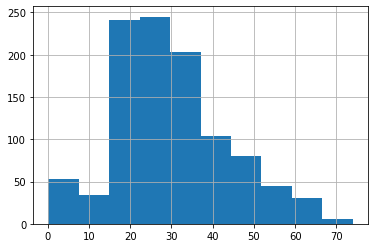

In [ ]:
#what does the distribution of ages look like?
df_titanic.Age_wiki.hist()

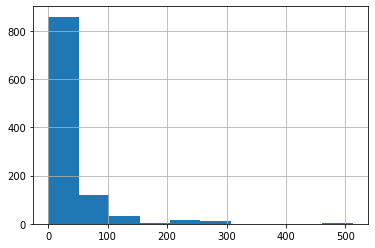

In [ ]:
#is fare numeric, if so what does its distribution look like?
df_titanic.Fare.hist()

In [ ]:
#let's only work with data where we have a value for the target variable: survived or not

#filter out missing survival data
df_titanic_survived = df_titanic[df_titanic.Survived.isna()==False]

#check to make sure all worked
df_titanic_survived.isna().sum() / len(df_titanic_survived)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.197183
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771831
Embarked       0.001408
WikiId         0.001408
Name_wiki      0.001408
Age_wiki       0.004225
Hometown       0.001408
Boarded        0.001408
Destination    0.001408
Lifeboat       0.604225
Body           0.897183
Class          0.001408
dtype: float64

### Exploration and visualization

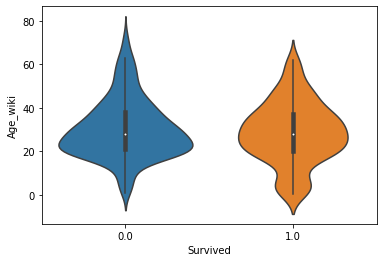

In [ ]:
#Is age related to 
sns.violinplot(data=df_titanic_survived, x='Survived', y='Age_wiki')

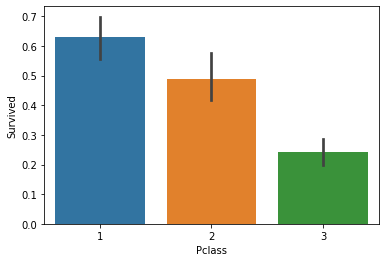

In [ ]:
sns.barplot(data=df_titanic_survived, y='Survived', x='Pclass')

### Data Preprocessing

> Feel free here to work with a subset of features that you think will help make predictions in the with-held dataset! I.e., what relationships will generalize well?

Let's one hot encode Pclass 

In [ ]:
#convert Pclass to category
df_titanic_survived['Pclass'] = df_titanic_survived.Pclass.astype('category')

#categorical variables
cat_names = ['Pclass','Embarked']

#create dummy variables
df_cat = pd.get_dummies(df_titanic_survived[cat_names])

#add them back to the original dataframe
df_titanic_survived = pd.concat([df_titanic_survived,df_cat], axis=1)

#remove the old columns
df_titanic_survived = df_titanic_survived.drop(cat_names, axis=1)

#take a look
df_titanic_survived.head(3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
2,185,1.0,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.025,NaN,940.0,"Kink, Miss Luise Gretchen",4.0,"Zürich, Switzerland",Southampton,"Milwaukee, Wisconsin, US",2,NaN,3.0,0,0,1,0,0,1
3,769,0.0,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.150,NaN,1038.0,"Moran, Mr. Daniel James",27.0,"Askeaton, Limerick, Ireland",Queenstown,"Brooklyn, New York, US",NaN,NaN,3.0,0,0,1,0,1,0
5,118,0.0,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.000,NaN,580.0,"Turpin, Mr. William John Robert",29.0,"Plymouth, Devon, England",Southampton,"Salt Lake City, Utah, US",NaN,NaN,2.0,0,1,0,0,0,1


Let's convert Sex to 0/1

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#get the columns names of features you'd like to turn into 0/1
bin_names = ['Sex']

#create a dataframe of those features
bin_features = df_titanic_survived[bin_names]

#fit the scaler to those data
bin_scaler = OrdinalEncoder().fit(bin_features.values)

#use the scaler to transform your data
bin_features = bin_scaler.transform(bin_features.values)

#put these scaled features back into your transformed features dataframe
df_titanic_survived[bin_names] = bin_features

#take a look
df_titanic_survived.head(3)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
2,185,1.0,"Kink-Heilmann, Miss. Luise Gretchen",0.0,4.0,0,2,315153,22.025,NaN,940.0,"Kink, Miss Luise Gretchen",4.0,"Zürich, Switzerland",Southampton,"Milwaukee, Wisconsin, US",2,NaN,3.0,0,0,1,0,0,1
3,769,0.0,"Moran, Mr. Daniel J",1.0,NaN,1,0,371110,24.150,NaN,1038.0,"Moran, Mr. Daniel James",27.0,"Askeaton, Limerick, Ireland",Queenstown,"Brooklyn, New York, US",NaN,NaN,3.0,0,0,1,0,1,0
5,118,0.0,"Turpin, Mr. William John Robert",1.0,29.0,1,0,11668,21.000,NaN,580.0,"Turpin, Mr. William John Robert",29.0,"Plymouth, Devon, England",Southampton,"Salt Lake City, Utah, US",NaN,NaN,2.0,0,1,0,0,0,1


Let's split the data into training and testing

In [ ]:
#split the data into training and testing (80/20 split)
df_train, df_test = sk.model_selection.train_test_split(df_titanic_survived, test_size=0.20)

Let's scale age wiki

In [ ]:
#Feature Scaling (after spliting the data!)
from sklearn.preprocessing import StandardScaler 

#numeric variables
numb_names = ['Age_wiki','Fare','SibSp','Parch']

#create the standard scaler object
sc = StandardScaler()

#use this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data
df_train[numb_names] = sc.fit_transform(df_train[numb_names])

#use the fit from the training data to transform the test data
df_test[numb_names] = sc.transform(df_test[numb_names])

## Model building

In [ ]:
#define model parameters
log_reg_sur = smf.logit('Survived ~ Age_wiki + Fare + SibSp + Parch + Pclass_1 + Pclass_2 + Embarked_Q + Embarked_S', data=df_train)

#fit the model to the training data
results_sur = log_reg_sur.fit()

#Get a summary of the model parameters
print(results_sur.summary())

Optimization terminated successfully.
         Current function value: 0.567840
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  565
Model:                          Logit   Df Residuals:                      556
Method:                           MLE   Df Model:                            8
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.1474
Time:                        19:44:15   Log-Likelihood:                -320.83
converged:                       True   LL-Null:                       -376.30
Covariance Type:            nonrobust   LLR p-value:                 2.434e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0854      0.268     -4.044      0.000      -1.611      -0.559
Age_wiki      -0.5273      0.

In [ ]:
#let's first predict values in the testing dataset
df_test['survive_prob'] = results_sur.predict(df_test).round(2)

df_test['survive_pred'] = (df_test['survive_prob']>0.5).astype(int) #here we've used 0.5 as the threshold of benign or not!

df_test.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,survive_prob,survive_pred
702,601,1.0,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",0.0,24.0,1.498682,0.858651,243847,-0.112156,NaN,466.0,"Jacobsohn, Mrs. Amy Frances Christy (née Cohen)",-0.429398,"London, England",Southampton,"Montreal, Quebec, Canada",12,NaN,2.0,0,1,0,0,0,1,0.45,0
536,215,0.0,"Kiernan, Mr. Philip",1.0,NaN,0.512296,-0.455942,367229,-0.466055,NaN,936.0,"Kiernan, Mr. Philip",-0.575205,"Aughnacliffe, Longford, Ireland",Queenstown,"Jersey City, New Jersey, US",NaN,NaN,3.0,0,0,1,0,1,0,0.40,0
194,802,1.0,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",0.0,31.0,0.512296,0.858651,C.A. 31921,-0.125945,NaN,384.0,"Collyer, Mrs. Charlotte Annie (née Tate)",0.080925,"Bishopstoke, Hampshire, England",Southampton,"Payette, Idaho, US",14,NaN,2.0,0,1,0,0,0,1,0.46,0


Let's measure the performance of our model on our with-held data set. This will give us an idea of how the model might perform on the data set I (tyler) took out before class! 

Text(33.0, 0.5, 'True label')

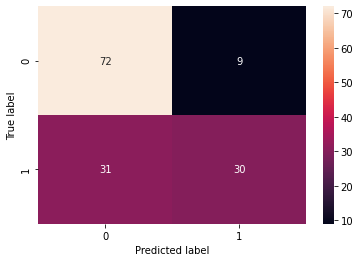

In [ ]:
confusion_matrix_sur = sk.metrics.confusion_matrix(df_test['Survived'], df_test['survive_pred'])
sns.heatmap(confusion_matrix_sur, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')


In [ ]:
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(df_test['Survived'], df_test['survive_pred'])))
print('Precision: {:.2f}'.format(sk.metrics.precision_score(df_test['Survived'], df_test['survive_pred'])))
print('Recall: {:.2f}'.format(sk.metrics.recall_score(df_test['Survived'], df_test['survive_pred'])))

Accuracy: 0.72
Precision: 0.77
Recall: 0.49


### Model predictions

When you've got a good model and you are ready to test it out let me know and i'll send you the withheld data! When you measure the performance of the model does it differ in accuracy, precision, and recall?

In [ ]:
#load the 'new' data 

#use your model to make predictions

#measure the performace of your model (did it correctly predict the new data?)